In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [3]:
x = np.array([
 2.62691560e+00, 3.36446960e+00, 4.26536341e+00, 5.35259563e+00,
 6.64877804e+00, 8.17500991e+00, 9.94955976e+00, 1.19863972e+01,
 1.42936397e+01, 1.68719995e+01, 1.97133353e+01, 2.27994241e+01,
 2.61010751e+01, 2.95777010e+01, 3.31774484e+01, 3.68379598e+01,
 4.04878053e+01, 4.40485750e+01, 4.74375756e+01, 5.05710242e+01,
 5.33675862e+01, 5.57520671e+01, 5.76590471e+01, 5.90362341e+01,
 5.98473258e+01, 6.00741945e+01, 5.97182529e+01, 5.88009100e+01,
 5.73630905e+01, 5.54638467e+01, 5.31781562e+01, 5.05940378e+01,
 4.78091576e+01, 4.49271136e+01, 4.20535879e+01, 3.92925450e+01,
 3.67426312e+01, 3.44938974e+01, 3.26249342e+01, 3.12004777e+01,
 3.02695143e+01, 2.98638946e+01, 2.99974551e+01, 3.06656425e+01,
 3.18456369e+01, 3.34969755e+01, 3.55626811e+01, 3.79709002e+01,
 4.06370473e+01, 4.34664371e+01, 4.63573620e+01, 4.92045425e+01,
 5.19028450e+01, 5.43511267e+01, 5.64560417e+01, 5.81356216e+01,
 5.93224396e+01, 5.99661774e+01, 6.00354396e+01, 5.95187004e+01,
 5.84243218e+01, 5.67796405e+01, 5.46291826e+01, 5.20321227e+01,
 4.90591546e+01, 4.57889709e+01, 4.23045735e+01, 3.86896312e+01,
 3.50250911e+01, 3.13862140e+01, 2.78401661e+01, 2.44442490e+01,
 2.12448012e+01, 1.82767558e+01, 1.55637969e+01, 1.31190288e+01,
 1.09460460e+01, 9.04028545e+00, 7.39054028e+00, 5.98052512e+00,
 4.79039666e+00, 3.79815441e+00, 2.98086776e+00, 2.31569700e+00,
 1.78069555e+00, 1.35539699e+00, 1.02120341e+00, 7.61599912e-01,
 5.62225321e-01, 4.10830616e-01, 2.97155711e-01, 2.12752289e-01,
 1.50776369e-01, 1.05769682e-01, 7.34442823e-02, 5.04805017e-02,
 3.43445801e-02, 2.31292545e-02, 1.54182093e-02, 1.01736107e-02])

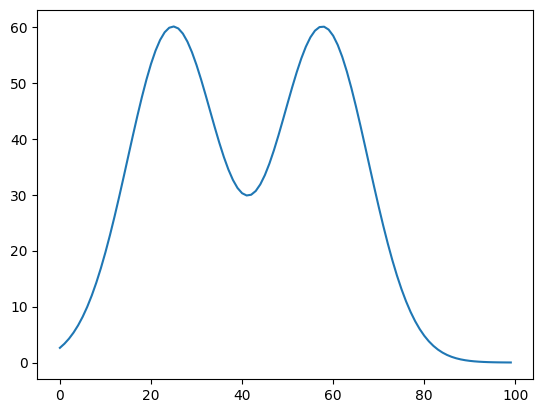

In [4]:
plt.plot(x)

In [5]:
_x = (x.max() - x)

In [6]:
(_x / _x.sum()).sum()

1.0

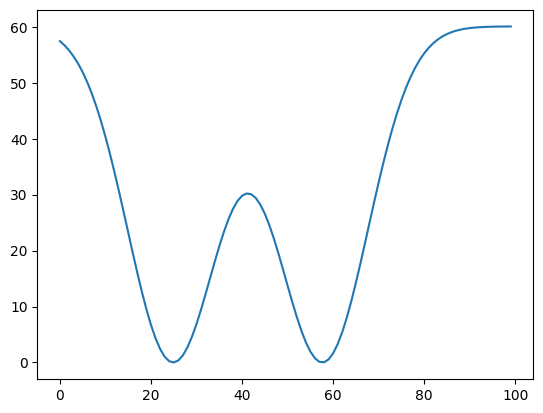

In [7]:
plt.plot(_x)

In [48]:
x = np.linspace(0, 1, 24)

(0.0, 1.0)

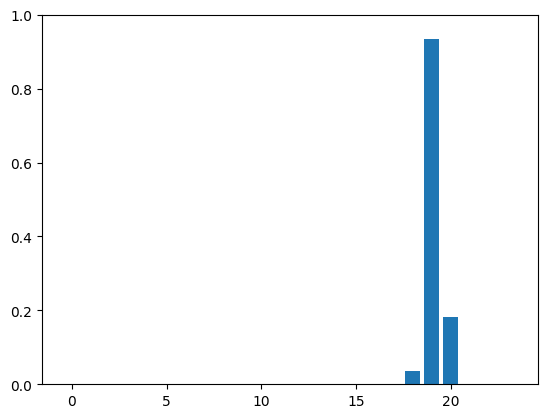

In [53]:
plt.bar(range(24), np.exp(-np.abs((x - 20/24)*36)**2))
plt.ylim(0, 1)

In [29]:
np.exp(-np.abs((17 - 12.5)/100)**2)

0.9979770489292394